<a href="https://colab.research.google.com/github/ejaifeobuks/Tesla-Stock-Price-Prediction/blob/main/Tesla_Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Transportation Dataset/tsla_2014_2023.csv')

In [5]:
df.shape

(2516, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [7]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
rsi_7,0
rsi_14,0
cci_7,0
cci_14,0


In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')

In [9]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
date,,,,,,,,,,,,,,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


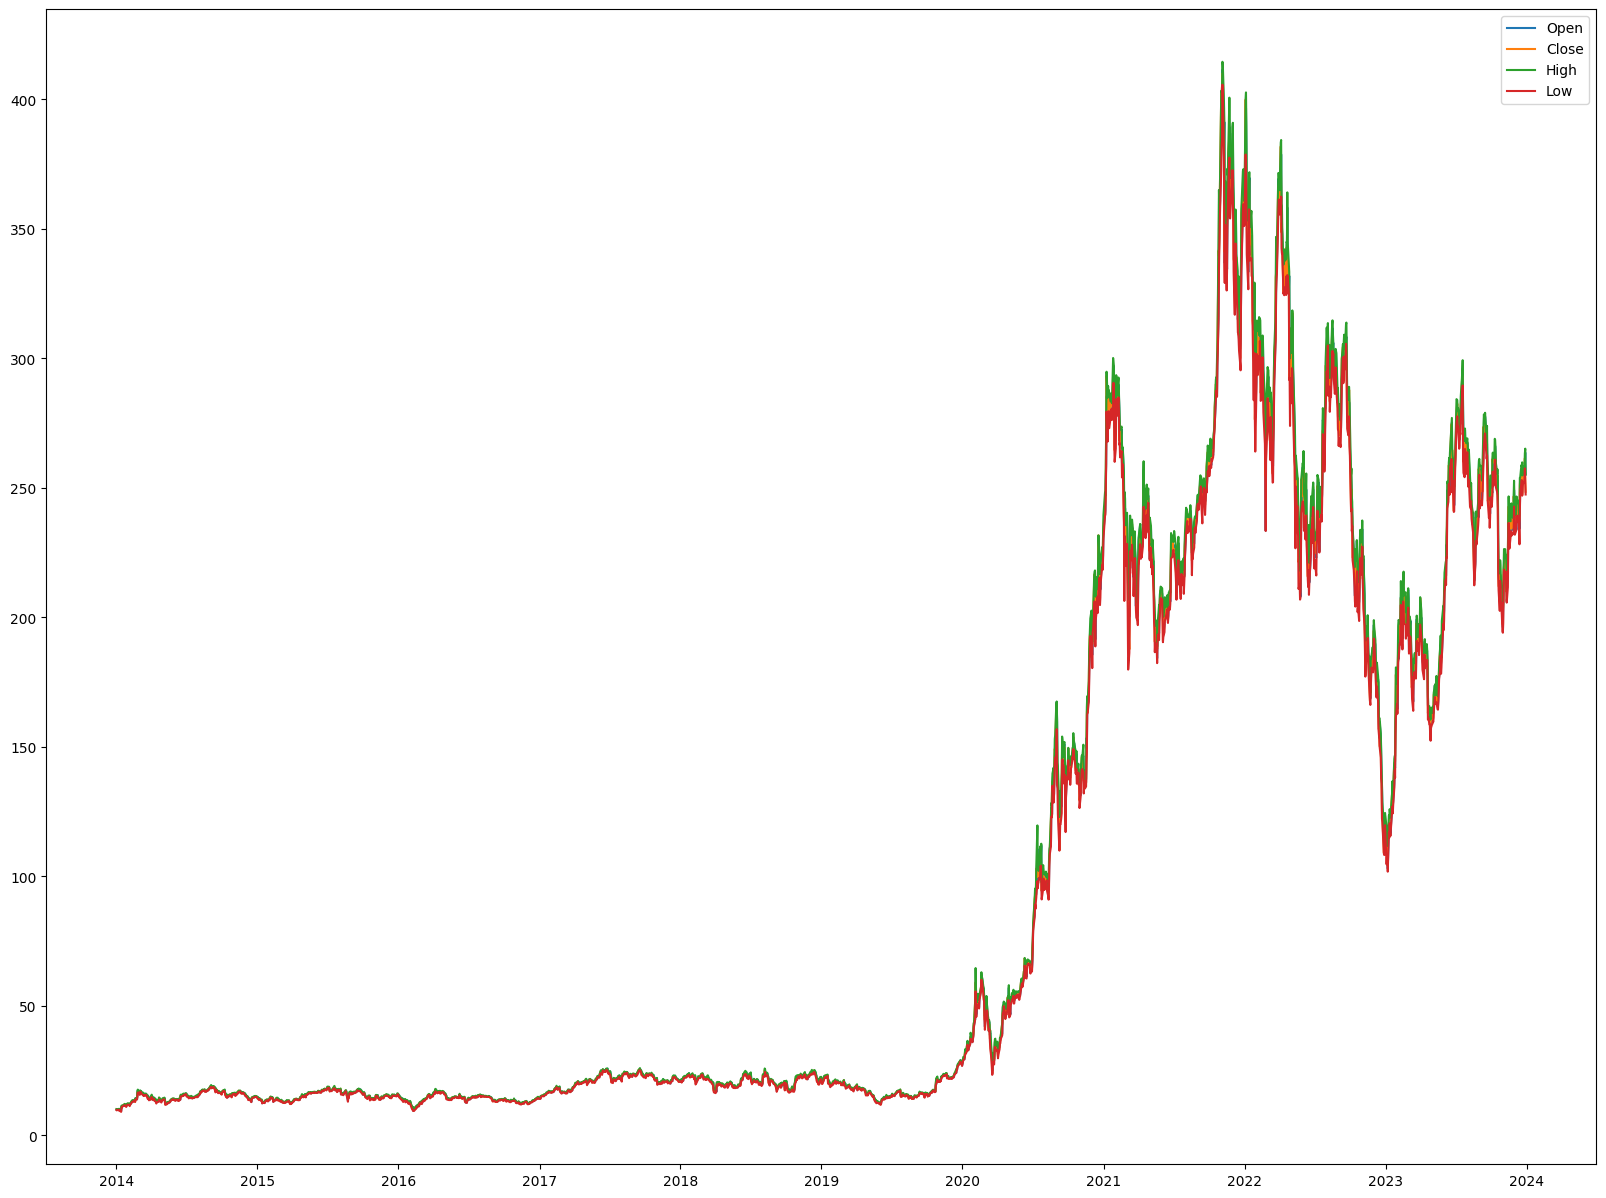

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(df.index,df['open'],label='Open')
plt.plot(df.index,df['close'],label='Close')
plt.plot(df.index,df['high'],label='High')
plt.plot(df.index,df['low'],label='Low')
plt.legend()

<Axes: >

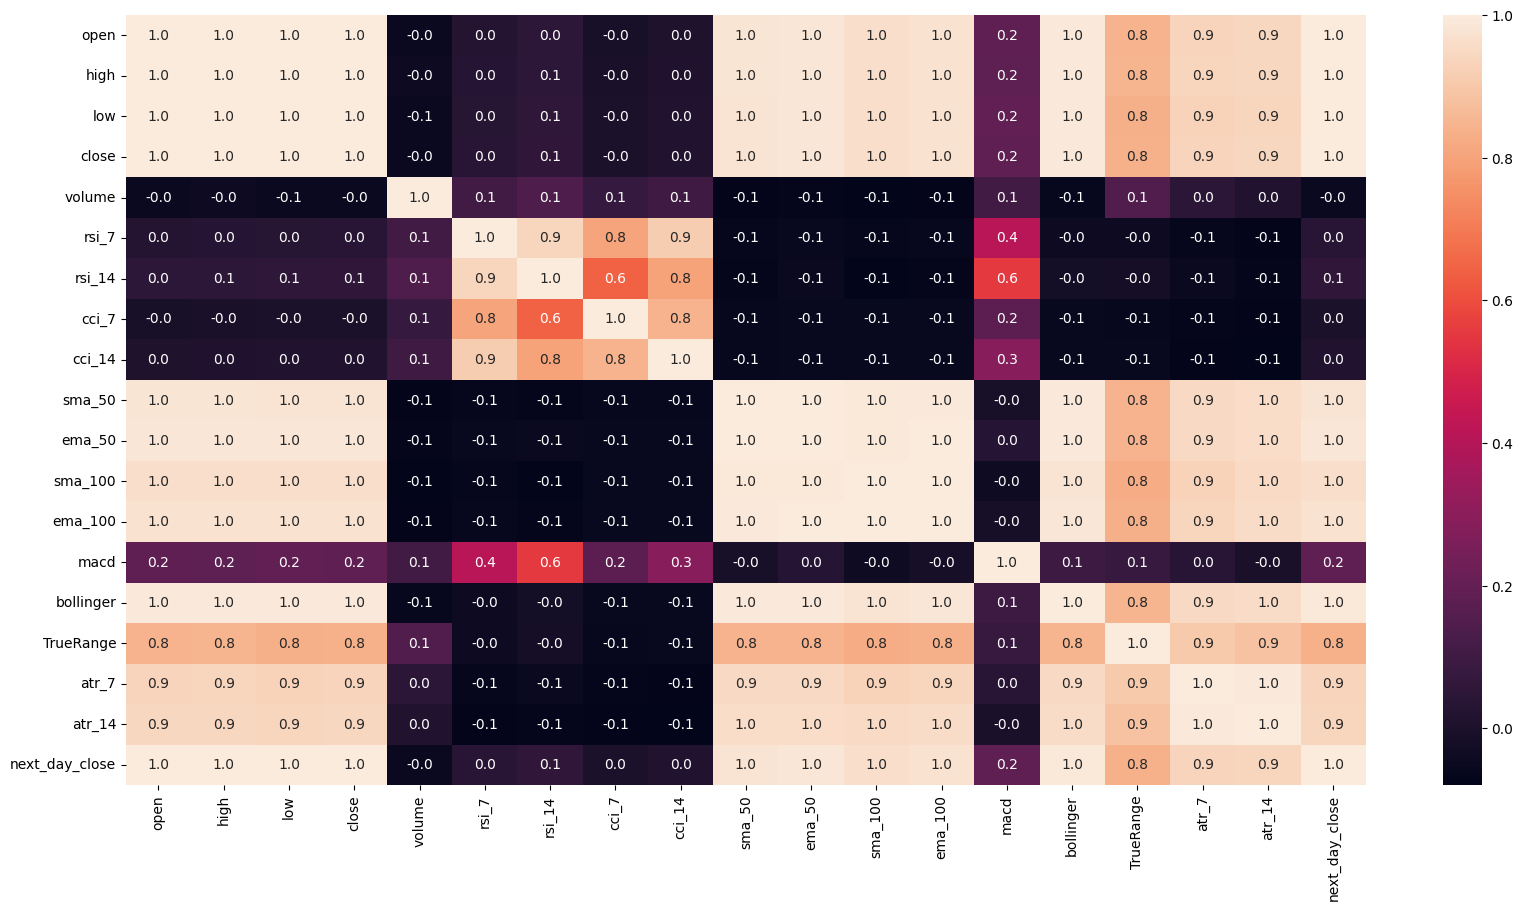

In [12]:
df_corr=df.corr()
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,fmt='.1f')

In [13]:
Y=df['next_day_close']
X=df.drop(columns='next_day_close')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=777)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,Y_train)
model_prediction=model.predict(X_test)
from sklearn.metrics import mean_absolute_error
model_mae=mean_absolute_error(Y_test,model_prediction)
accuracy=r2_score(Y_test,model_prediction)
print(model_mae)
print(accuracy)

2.386749335496072
0.9978462950966714


In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr_model=DecisionTreeRegressor()
dtr_model.fit(X_train,Y_train)
dtr_model_prediction=dtr_model.predict(X_test)
dtr_model_mae=mean_absolute_error(Y_test,dtr_model_prediction)
print(dtr_model_mae)

3.512115343253969


In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train,Y_train)
rfr_model_prediction=rfr_model.predict(X_test)
rfr_model_mae=mean_absolute_error(Y_test,rfr_model_prediction)
print(rfr_model_mae)

2.6817292968452358


In [19]:
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(X_train,Y_train)
svr_model_prediction=svr_model.predict(X_test)
svr_model_mae=mean_absolute_error(Y_test,svr_model_prediction)
print(svr_model_mae)

12.363372346370664
